LINEAR REGRESSION

Linear Regression Evaluation:
Train R²   : 0.9854
Test R²    : 0.9777
Train RMSE : 9.7939
Test RMSE  : 10.5035
Test MAE   : 8.5836
RIDGE REGRESSION

Ridge Regression Evaluation:
Train R²   : 0.9854
Test R²    : 0.9778
Train RMSE : 9.7958
Test RMSE  : 10.4824
Test MAE   : 8.5687
LASSO REGRESSION

Lasso Regression Evaluation:
Train R²   : 0.9854
Test R²    : 0.9778
Train RMSE : 9.7954
Test RMSE  : 10.4927
Test MAE   : 8.5748
ELASTIC NET REGRESSION

ElasticNet Regression Evaluation:
Train R²   : 0.9833
Test R²    : 0.9773
Train RMSE : 10.4825
Test RMSE  : 10.6047
Test MAE   : 8.6311


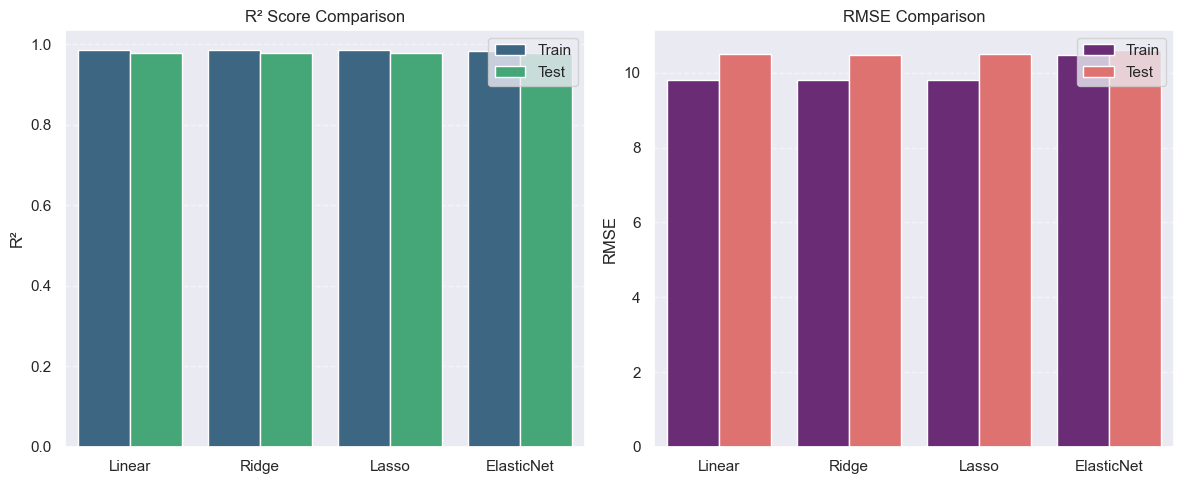

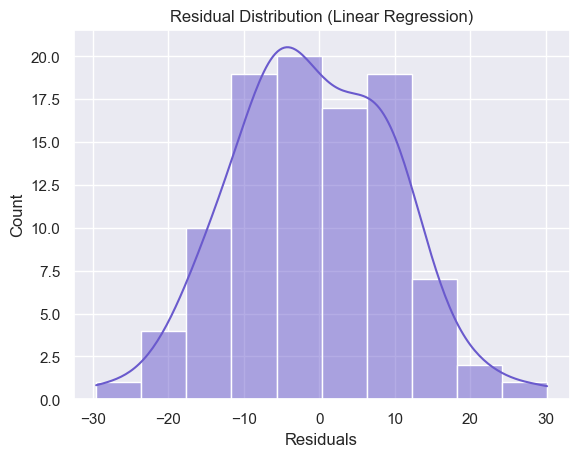

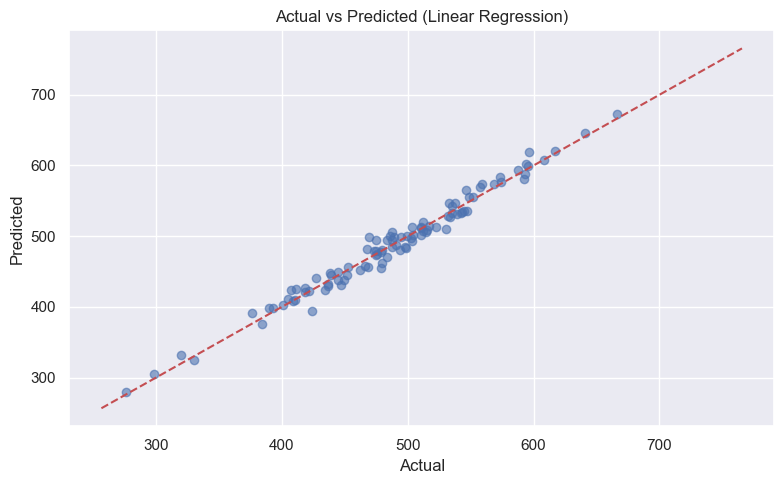

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#=====================================================
# Function: Evaluate model and return metrics
#=====================================================
def evaluate_model(model, X_train, X_test, y_train, y_test, name='Model'):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    print(f"\n{name} Evaluation:")
    print(f"Train R²   : {train_r2:.4f}")
    print(f"Test R²    : {test_r2:.4f}")
    print(f"Train RMSE : {train_rmse:.4f}")
    print(f"Test RMSE  : {test_rmse:.4f}")
    print(f"Test MAE   : {test_mae:.4f}")

    return {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'y_pred_test': y_pred_test
    }

#=====================================================
# Load and Prepare Data
#=====================================================
df = pd.read_csv('./data/linear-regression/Ecommerce Customers.csv')

features = ['Avg. Session Length', 'Time on App', 'Length of Membership']
X = df[features]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#=====================================================
# Train and Evaluate Models
#=====================================================
print("=" * 50)
print("LINEAR REGRESSION")
print("=" * 50)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_result = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Linear Regression')

print("=" * 50)
print("RIDGE REGRESSION")
print("=" * 50)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_result = evaluate_model(ridge_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Ridge Regression')

print("=" * 50)
print("LASSO REGRESSION")
print("=" * 50)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_result = evaluate_model(lasso_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Lasso Regression')

print("=" * 50)
print("ELASTIC NET REGRESSION")
print("=" * 50)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio=0.5 artinya kombinasi L1 dan L2 seimbang
elastic_model.fit(X_train_scaled, y_train)
elastic_result = evaluate_model(elastic_model, X_train_scaled, X_test_scaled, y_train, y_test, 'ElasticNet Regression')

#=====================================================
# Comparison Plot (Train & Test R² / RMSE)
#=====================================================
models = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
train_r2s = [lr_result['train_r2'], ridge_result['train_r2'], lasso_result['train_r2'], elastic_result['train_r2']]
test_r2s = [lr_result['test_r2'], ridge_result['test_r2'], lasso_result['test_r2'], elastic_result['test_r2']]
train_rmses = [lr_result['train_rmse'], ridge_result['train_rmse'], lasso_result['train_rmse'], elastic_result['train_rmse']]
test_rmses = [lr_result['test_rmse'], ridge_result['test_rmse'], lasso_result['test_rmse'], elastic_result['test_rmse']]

# R² Comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=models * 2, y=train_r2s + test_r2s,
            hue=["Train"] * 4 + ["Test"] * 4,
            palette="viridis")
plt.title("R² Score Comparison")
plt.ylabel("R²")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# RMSE Comparison
plt.subplot(1, 2, 2)
sns.barplot(x=models * 2, y=train_rmses + test_rmses,
            hue=["Train"] * 4 + ["Test"] * 4,
            palette="magma")
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#=====================================================
# Residual Analysis (Linear Regression)
#=====================================================
residuals = y_test - lr_result['y_pred_test']
sns.histplot(residuals, kde=True, color='slateblue')
plt.title('Residual Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(y_test, lr_result['y_pred_test'], alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()
